Exercise 1 - Entropy of a random variable with 3 outcomes
3
1. Given a random variable with 3 outcomes, write a program to plot the entropy
as a function of all possible probability vectors

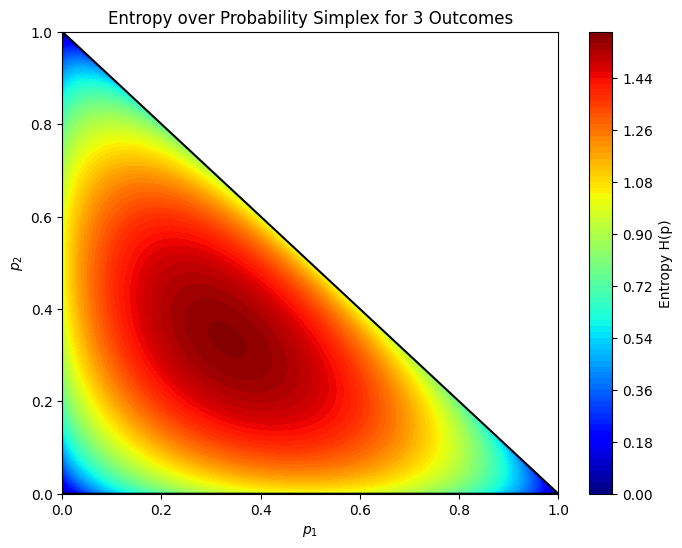

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Entropy function for a probability vector
def entropy(p):
    p = np.array(p)
    # Remove zero probabilities to avoid log(0)
    p = p[p > 0]
    return -np.sum(p * np.log2(p))

# Generate all possible probability vectors for 3 outcomes
def generate_probability_vectors(step=0.01):
    p1_values = np.arange(0, 1 + step, step)
    p2_values = np.arange(0, 1 + step, step)
    P1, P2 = np.meshgrid(p1_values, p2_values)
    P3 = 1 - P1 - P2
    # Filter valid probability vectors where all probabilities are between 0 and 1
    valid = (P1 >= 0) & (P2 >= 0) & (P3 >= 0) & (P3 <= 1)
    P1_valid = P1[valid]
    P2_valid = P2[valid]
    P3_valid = P3[valid]
    # Compute entropy for each valid probability vector
    entropies = np.array([entropy([p1, p2, p3]) for p1, p2, p3 in zip(P1_valid, P2_valid, P3_valid)])
    return P1_valid, P2_valid, entropies

# Plot the entropy as a function over the probability simplex
def plot_entropy_surface():
    P1, P2, entropies = generate_probability_vectors(step=0.01)
    # Create a 2D scatter plot with color coding for entropy
    plt.figure(figsize=(8, 6))
    plt.tricontourf(P1, P2, entropies, levels=100, cmap='jet')
    plt.colorbar(label='Entropy H(p)')
    plt.xlabel('$p_1$')
    plt.ylabel('$p_2$')
    plt.title('Entropy over Probability Simplex for 3 Outcomes')
    # Add the boundary of the simplex
    simplex_boundary = np.array([[0, 0], [1, 0], [0, 1]])
    plt.plot(simplex_boundary[:, 0], simplex_boundary[:, 1], 'k-')
    plt.show()

# Main function to execute the plotting
def main():
    
    plot_entropy_surface()

if __name__ == '__main__':
    main()


Key Observations:

    The entropy is highest when the probabilities are closer to being equally distributed.
    The entropy decreases as the probabilities deviate more from uniformity.

Start with a probability vector where one of the elements is significantly higher
than the others. Apply an iterative averaging procedure (for example, replace
each element with the average of itself and its neighbors, followed by
normalization). For each updated vector, compute the entropy and plot its
value on the figure generated in step 1. Show that as the probability
distribution approaches the uniform distribution, the entropy approaches its
maximum value. Finally, discuss the results.

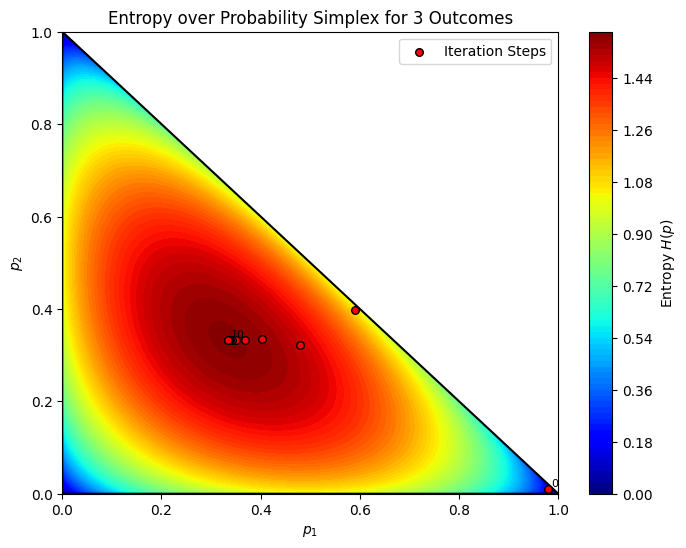

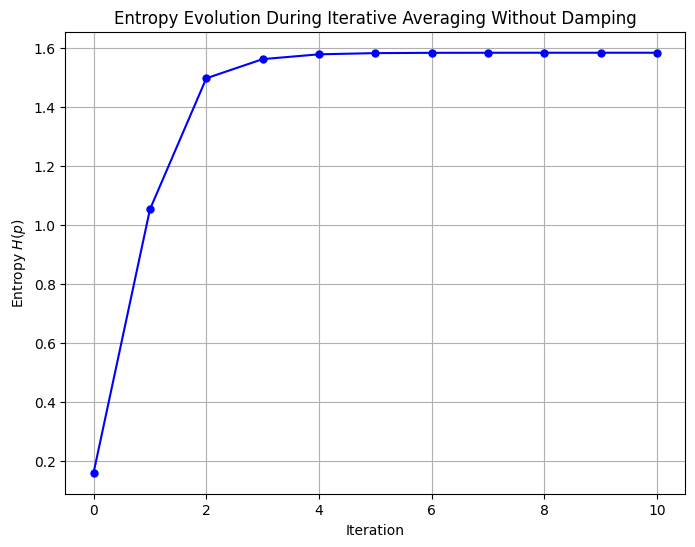

Iteration |   p1     |   p2     |   p3     | Entropy (bits)
-----------------------------------------------------------
        0 |  0.9800 |  0.0100 |  0.0100 |        0.1614
        1 |  0.5905 |  0.3976 |  0.0119 |        1.0541
        2 |  0.4787 |  0.3230 |  0.1984 |        1.4984
        3 |  0.4029 |  0.3351 |  0.2620 |        1.5633
        4 |  0.3687 |  0.3330 |  0.2983 |        1.5796
        5 |  0.3509 |  0.3334 |  0.3157 |        1.5836
        6 |  0.3421 |  0.3333 |  0.3245 |        1.5846
        7 |  0.3377 |  0.3333 |  0.3289 |        1.5849
        8 |  0.3355 |  0.3333 |  0.3311 |        1.5849
        9 |  0.3344 |  0.3333 |  0.3322 |        1.5850
       10 |  0.3339 |  0.3333 |  0.3328 |        1.5850


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Entropy function for a probability vector
def entropy(p):
    p = np.array(p)
    # Remove zero probabilities to avoid log(0)
    p = p[p > 0]
    return -np.sum(p * np.log2(p))

# Generate all possible probability vectors for 3 outcomes
def generate_probability_vectors(step=0.01):
    p1_values = np.arange(0, 1 + step, step)
    p2_values = np.arange(0, 1 + step, step)
    P1, P2 = np.meshgrid(p1_values, p2_values)
    P3 = 1 - P1 - P2
    # Filter valid probability vectors where all probabilities are between 0 and 1
    valid = (P1 >= 0) & (P2 >= 0) & (P3 >= 0)
    P1_valid = P1[valid]
    P2_valid = P2[valid]
    P3_valid = P3[valid]
    # Compute entropy for each valid probability vector
    entropies = - (P1_valid * np.log2(P1_valid, where=(P1_valid > 0)) +
                   P2_valid * np.log2(P2_valid, where=(P2_valid > 0)) +
                   P3_valid * np.log2(P3_valid, where=(P3_valid > 0)))
    return P1_valid, P2_valid, entropies

# Iterative averaging without damping and entropy calculation
def iterative_averaging_without_damping(start_vector, iterations=10):
    prob_vector = np.array(start_vector)
    prob_vectors = [prob_vector.copy()]
    entropies_iter = [entropy(prob_vector)]
    
    for _ in range(iterations):
        # Compute the average with neighbors
        p1_new = (prob_vector[0] + prob_vector[1]) / 2
        p2_new = (prob_vector[0] + prob_vector[1] + prob_vector[2]) / 3
        p3_new = (prob_vector[1] + prob_vector[2]) / 2
        
        # Form the new vector
        prob_vector = np.array([p1_new, p2_new, p3_new])
        
        # Normalize
        prob_vector /= np.sum(prob_vector)
        
        prob_vectors.append(prob_vector.copy())
        entropies_iter.append(entropy(prob_vector))
    
    return np.array(prob_vectors), np.array(entropies_iter)

# Plot the entropy surface with steps and display the table of changes
def plot_entropy_surface_with_steps_and_table():
    # Create entropy contour plot
    P1, P2, entropies = generate_probability_vectors(step=0.01)
    plt.figure(figsize=(8, 6))
    contour = plt.tricontourf(P1, P2, entropies, levels=100, cmap='jet')
    
    cbar = plt.colorbar(contour)
    cbar.set_label('Entropy $H(p)$')
    plt.xlabel('$p_1$')
    plt.ylabel('$p_2$')
    plt.title('Entropy over Probability Simplex for 3 Outcomes')
    simplex_boundary = np.array([[0, 0], [1, 0], [0, 1], [0, 0]])
    plt.plot(simplex_boundary[:, 0], simplex_boundary[:, 1], 'k-')

    # Iterative averaging process
    start_vector = [0.98, 0.01, 0.01]  # Skewed probability vector
    iterations = 10
    prob_vectors, entropies_iter = iterative_averaging_without_damping(start_vector, iterations)

    # Plot each iteration as individual dots
    p1_steps = prob_vectors[:, 0]
    p2_steps = prob_vectors[:, 1]
    plt.scatter(p1_steps, p2_steps, c='red', edgecolors='black', s=30, zorder=5, label='Iteration Steps')

    # Label fewer steps (every 10th iteration)
    for i, (p1, p2) in enumerate(zip(p1_steps, p2_steps)):
        if i % 10 == 0:  # Label every 10th iteration
            plt.text(p1 + 0.005, p2 + 0.005, f'{i}', fontsize=8, color='black')

    plt.legend()
    plt.show()

    # Plot entropy over iterations
    plt.figure(figsize=(8, 6))
    plt.plot(range(iterations + 1), entropies_iter, 'o-', color='blue', markersize=5)
    plt.xlabel('Iteration')
    plt.ylabel('Entropy $H(p)$')
    plt.title('Entropy Evolution During Iterative Averaging Without Damping')
    plt.grid(True)
    plt.show()

    # Display the table of changes
    print('Iteration |   p1     |   p2     |   p3     | Entropy (bits)')
    print('-----------------------------------------------------------')
    for i, (pv, H) in enumerate(zip(prob_vectors, entropies_iter)):
        print(f'{i:9d} | {pv[0]:7.4f} | {pv[1]:7.4f} | {pv[2]:7.4f} | {H:13.4f}')

# Main function to execute everything
def main():
    plot_entropy_surface_with_steps_and_table()

if __name__ == '__main__':
    main()
